<a href="https://colab.research.google.com/github/herbert0419/machine-learning-algos/blob/main/Handling_Imbalance_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Import Libraries***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

## ***Generate Imbalance Dataset***

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

## ***Features & labels***

In [4]:
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

## ***Plot the dataset***

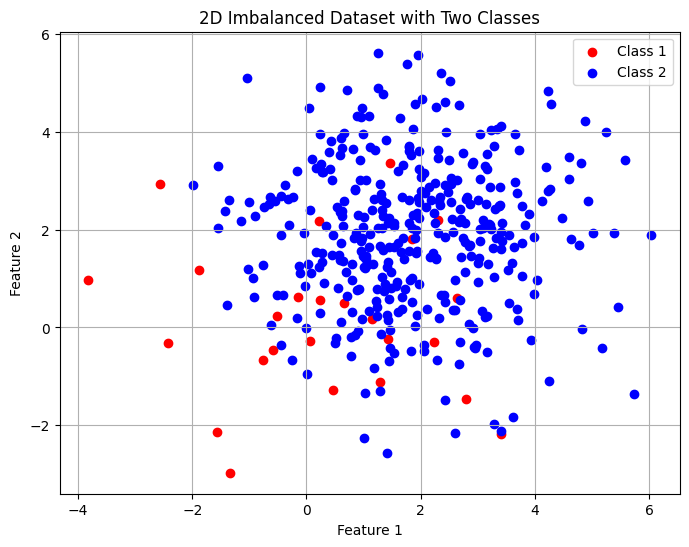

In [5]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

***The blue dots here are the majority class of the dataset & red ones are the minority class. Now, we will use the data to create a classification model. For that let's start with importing the libraries.***

In [6]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

### ***Split dataset into training and testing sets***

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ***Initialize the classifier algorithm***




In [8]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### ***Predict test set***

In [9]:
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]

### ***Print classification report***


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.96      1.00      0.98       113

    accuracy                           0.96       120
   macro avg       0.98      0.64      0.71       120
weighted avg       0.96      0.96      0.95       120



### ***Print ROC AUC Score***

In [11]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9557522123893806


### ***Plotting ROC-AUC Curve***

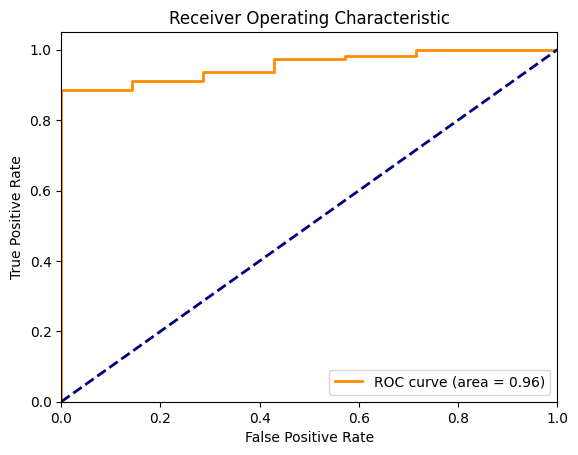

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ***Plot Decision Boundaries***

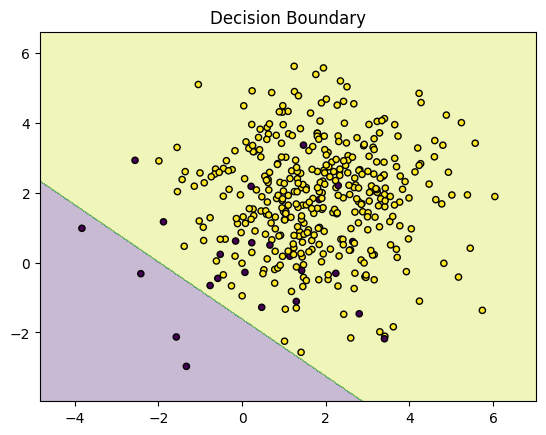

In [13]:
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier)

***The model is unable to classify the majority & the minority class, this is the reason why it is somewhat biased towards the majority class of the dataset.Now, we'll start with the various methods of handling imbalance dataset.***

1.   Upsampling using Randomupsampling
2.   Oversampling using Randomoversampler
3.   SMOTE
4.   Balanced Random Forest
5.   Class Weights
6.   Custom Loss Function

### ***1. Upsampling using Randomupsampling***

In [14]:
from imblearn.over_sampling import RandomOverSampler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

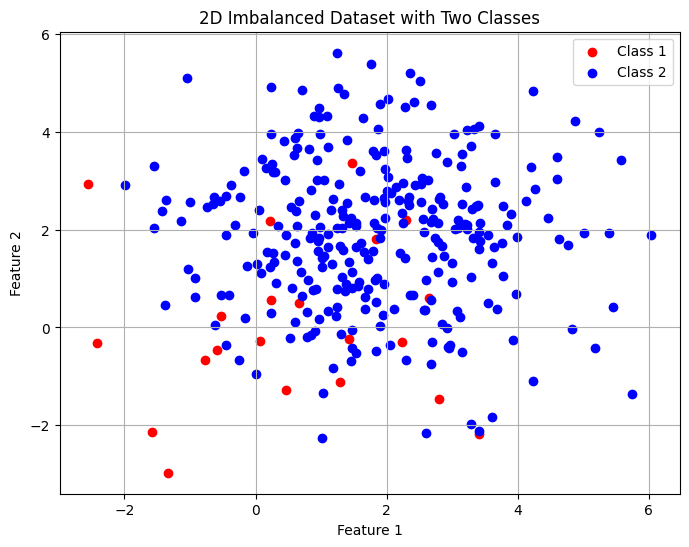

In [17]:
# Plotting the imbalaced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

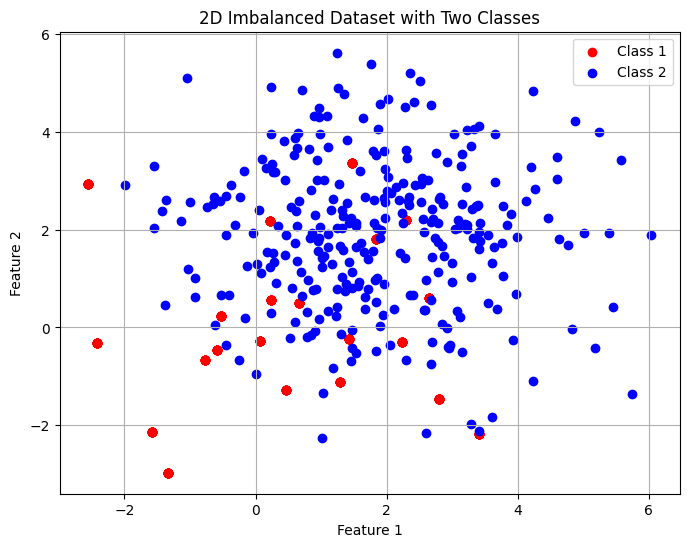

In [18]:
# Plotting the dataset after RandomOverSampling
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()